In [1]:
# importing dependencies
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sms
import numpy as np
import datetime as dt
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Importing plotly failed. Interactive plots will not work.


In [9]:
# read in CSV training data
df = pd.read_csv('C:/Users/sweir/OneDrive/Desktop/Analysis Projects/Crude_Oil_Price_Projection/ML Resources/Cleaned_Crude_Oil_Dataset.csv')
df

,Date,"Cushing, OK Crude Oil Future Contract ($/Bar.)",U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,"Cushing, OK WTI Spot Price FOB ($/Bar.)"
0,1/1/1986,23.0,283248,498728,12583,15459,14639,820,81.4,22.9
1,2/1/1986,15.5,256855,453209,12068,15485,14538,947,77.9,15.5
2,3/1/1986,12.6,279413,504565,11759,15485,14517,968,75.9,12.6
3,4/1/1986,12.8,265917,478339,12603,15473,14550,923,81.5,12.8
4,5/1/1986,15.3,273964,495789,13314,15484,14805,679,86.0,15.4
...,...,...,...,...,...,...,...,...,...,...
425,6/1/2021,71.4,338645,616115,16743,18128,17910,218,92.4,71.4
426,7/1/2021,72.4,351228,616714,16482,18129,17943,187,90.9,72.5
427,8/1/2021,67.7,347393,635828,16377,18130,17914,216,90.3,67.7
428,9/1/2021,71.5,324654,606706,15797,18130,15800,2331,87.1,71.6


In [10]:
# viewing datatypes
df.dtypes

Date                                                                object
Cushing, OK Crude Oil Future Contract ($/Bar.)                     float64
U.S. Field Production of Crude Oil (1k Bar.)                         int64
Product Supplied of Crude Oil and Petroleum Products (1k Bar.)       int64
Gross Inputs to Refineries (1k Bar./Day)                             int64
Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)      int64
Operating Crude Oil Distillation Capacity (1k Bar./Day)              int64
Idle Crude Oil Distillation Capacity (1k Bar./Day)                   int64
Percent Utilization of Refinery Operable Capacity                  float64
Cushing, OK WTI Spot Price FOB ($/Bar.)                            float64
dtype: object

In [11]:
# to convert the date column to type DATETIME
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# retrieving number of observations
len(df)

430

In [13]:
# renaming columns to fit naming conventions of prophet
df.rename(columns={'Date': 'ds', 'Cushing, OK Crude Oil Future Contract ($/Bar.)': 'y'}, inplace=True)


In [14]:
# dropping all other columns
df.drop(['U.S. Field Production of Crude Oil (1k Bar.)', 'Product Supplied of Crude Oil and Petroleum Products (1k Bar.)', 'Gross Inputs to Refineries (1k Bar./Day)', 'Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)', 'Operating Crude Oil Distillation Capacity (1k Bar./Day)', 'Idle Crude Oil Distillation Capacity (1k Bar./Day)', 'Percent Utilization of Refinery Operable Capacity', 'Cushing, OK WTI Spot Price FOB ($/Bar.)'], axis=1, inplace=True)

In [15]:
# reordering columns to fit prophet requirements
df1 = df[['y', 'ds']]
df1.head()

,y,ds
0,23.0,1986-01-01
1,15.5,1986-02-01
2,12.6,1986-03-01
3,12.8,1986-04-01
4,15.3,1986-05-01


In [16]:
# building/fitting the model 
m = Prophet(interval_width=0.95, seasonality_mode='multiplicative')
model = m.fit(df1)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = m.make_future_dataframe(periods=12,freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1986-01-01,15.793307,-9.935791,40.403117,15.793307,15.793307,-0.032549,-0.032549,-0.032549,-0.032549,-0.032549,-0.032549,0.0,0.0,0.0,15.279248
1,1986-02-01,15.829590,-11.483077,39.099931,15.829590,15.829590,-0.017630,-0.017630,-0.017630,-0.017630,-0.017630,-0.017630,0.0,0.0,0.0,15.550511
2,1986-03-01,15.862361,-10.739301,40.067319,15.862361,15.862361,0.007148,0.007148,0.007148,0.007148,0.007148,0.007148,0.0,0.0,0.0,15.975750
3,1986-04-01,15.898644,-9.046343,41.906944,15.898644,15.898644,0.034717,0.034717,0.034717,0.034717,0.034717,0.034717,0.0,0.0,0.0,16.450595
4,1986-05-01,15.933757,-7.891171,40.772657,15.933757,15.933757,0.045584,0.045584,0.045584,0.045584,0.045584,0.045584,0.0,0.0,0.0,16.660086


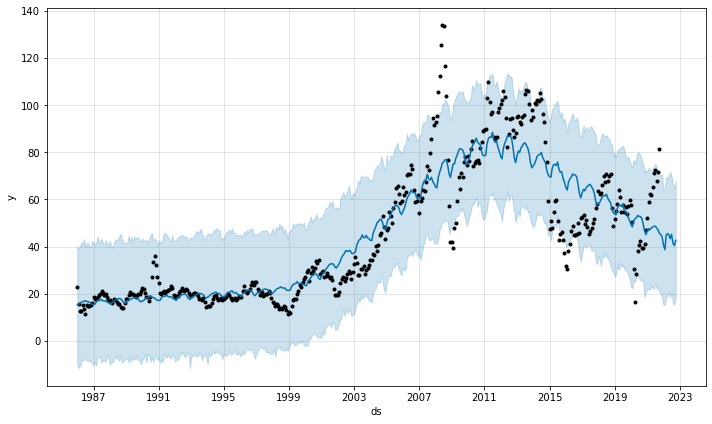

In [18]:
#initial visualization of model results
model_visualization = model.plot(forecast)

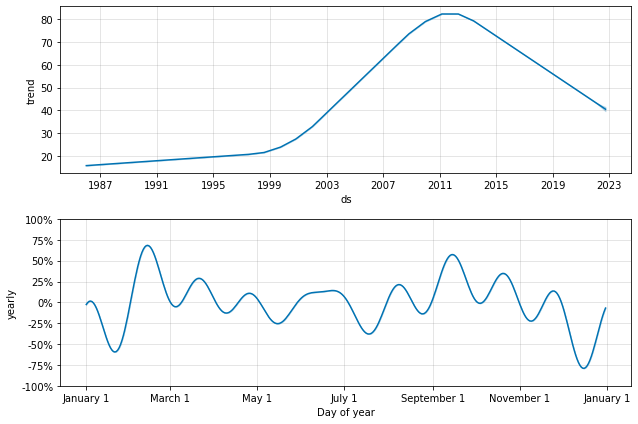

In [19]:
# plotting forecast components
forecast_components = model.plot_components(forecast)

In [20]:
#comparing initial projections to test data
df_crossval = cross_validation(m, initial='1825 days', period='180 days', horizon = '365 days')
df_crossval.head()

df_mtrcs = performance_metrics(df_crossval)
df_mtrcs.head()

INFO:prophet:Making 61 forecasts with cutoffs between 1991-03-08 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/61 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,364.203883,19.084126,12.220594,0.273173,0.199160,0.237219,0.684932
1,39 days,366.330524,19.139763,12.373284,0.273454,0.216919,0.238982,0.671233
2,40 days,352.822634,18.783574,12.247239,0.264404,0.216919,0.234512,0.675799
3,41 days,344.583990,18.562974,12.163870,0.264156,0.216919,0.237431,0.671233
4,42 days,342.484251,18.506330,12.112249,0.265711,0.216919,0.238557,0.684932
